In [1]:
# 1. Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # pip install xgboost if needed

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv(r"C:\Users\ADITHYA\OneDrive\Desktop\Adithya ML FIRST\job_suppression_expanded (1).xls")
df.head()

,Job.ID,Title,Company,City,Salary,Experience_Required,skill_match_score,exp_years_cand,exp_req_job,past_success_rate,search_activity,job_freshness,company_rating,salary_match,similar_views_freq,rec_freq_cap,views,applications,suppressed
0,1,Cloud Engineer,Wipro Digital,Noida,25+ LPA,8+ years,0.61,0.5,5,0.59,4.5,0.56,4.0,0.33,0.9,1.9,113,15,1
1,2,BI Developer,IBM India,Mumbai,18-25 LPA,8+ years,0.49,3.0,0,0.77,5.0,0.91,4.6,0.36,0.8,4.1,88,10,0
2,3,AI Engineer,Flipkart,Hyderabad,3-5 LPA,0-2 years,0.74,4.0,8,0.11,3.2,0.32,4.1,0.95,3.8,4.4,80,12,0
3,4,Business Analyst,L&T Technology Services,Delhi,18-25 LPA,Fresher,0.39,1.0,2,0.56,8.5,0.34,3.0,0.70,5.1,1.6,108,11,0
4,5,Big Data Engineer,Infosys BPM,Chennai,8-12 LPA,2-5 years,0.74,2.0,5,0.88,7.1,0.19,2.3,0.59,3.0,3.1,94,8,0


In [7]:
# 3. Basic info
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job.ID               10000 non-null  int64  
 1   Title                10000 non-null  object 
 2   Company              10000 non-null  object 
 3   City                 10000 non-null  object 
 4   Salary               10000 non-null  object 
 5   Experience_Required  10000 non-null  object 
 6   skill_match_score    10000 non-null  float64
 7   exp_years_cand       10000 non-null  float64
 8   exp_req_job          10000 non-null  int64  
 9   past_success_rate    10000 non-null  float64
 10  search_activity      10000 non-null  float64
 11  job_freshness        10000 non-null  float64
 12  company_rating       10000 non-null  float64
 13  salary_match         10000 non-null  float64
 14  similar_views_freq   10000 non-null  float64
 15  rec_freq_cap         10000 non-null  

,Job.ID,Title,Company,City,Salary,Experience_Required,skill_match_score,exp_years_cand,exp_req_job,past_success_rate,search_activity,job_freshness,company_rating,salary_match,similar_views_freq,rec_freq_cap,views,applications,suppressed
count,10000.00000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,34,50,13,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Full Stack Developer,PwC India,Thrissur,18-25 LPA,5-8 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,337,246,823,1762,2071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,NaN,NaN,NaN,0.551181,3.574150,3.646600,0.542769,6.237170,0.548876,3.502230,0.600828,4.992720,2.540820,99.936700,12.033100,0.361800
std,2886.89568,NaN,NaN,NaN,NaN,NaN,0.260414,3.117282,2.504583,0.255695,3.340008,0.258384,0.862514,0.231239,2.884759,1.417065,9.985633,3.466036,0.480545
min,1.00000,NaN,NaN,NaN,NaN,NaN,0.100000,0.000000,0.000000,0.100000,0.500000,0.100000,2.000000,0.200000,0.000000,0.100000,63.000000,2.000000,0.000000
25%,2500.75000,NaN,NaN,NaN,NaN,NaN,0.330000,1.000000,2.000000,0.320000,3.300000,0.330000,2.800000,0.400000,2.500000,1.300000,93.000000,10.000000,0.000000
50%,5000.50000,NaN,NaN,NaN,NaN,NaN,0.550000,3.000000,4.000000,0.540000,6.200000,0.550000,3.500000,0.600000,5.000000,2.500000,100.000000,12.000000,0.000000
75%,7500.25000,NaN,NaN,NaN,NaN,NaN,0.780000,5.000000,6.000000,0.770000,9.200000,0.770000,4.200000,0.800000,7.500000,3.800000,107.000000,14.000000,1.000000


In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.isna().sum()

Job.ID                 0
Title                  0
Company                0
City                   0
Salary                 0
Experience_Required    0
skill_match_score      0
exp_years_cand         0
exp_req_job            0
past_success_rate      0
search_activity        0
job_freshness          0
company_rating         0
salary_match           0
similar_views_freq     0
rec_freq_cap           0
views                  0
applications           0
suppressed             0
dtype: int64

In [15]:
# ============================================
# 2. BASIC CLEANING + PARSERS
# ============================================

# Drop duplicate jobs if any
df = df.drop_duplicates(subset=["Job.ID"]).reset_index(drop=True)

# ----- 2.1 Parse Salary like "18-25 LPA", "25+ LPA" to numeric (LPA) -----
def parse_salary_lpa(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()

    # Remove text
    s = s.replace("LPA", "").replace("lpa", "").strip()

    # "25+"
    if "+" in s:
        val = s.replace("+", "").strip()
        try:
            return float(val)
        except ValueError:
            return np.nan

    # "18-25"
    if "-" in s:
        low, high = s.split("-")
        try:
            return (float(low.strip()) + float(high.strip())) / 2.0
        except ValueError:
            return np.nan

    # "5"
    try:
        return float(s)
    except ValueError:
        return np.nan

df["Salary"] = df["Salary"].apply(parse_salary_lpa)


In [16]:
# ----- 2.2 Parse experience like "0-2 years", "8+ years" to numeric years -----
def parse_years(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().lower()
    # remove words
    for token in ["years", "year", "yrs", "yr"]:
        s = s.replace(token, "")
    s = s.strip()

    # "8+"
    if "+" in s:
        val = s.replace("+", "").strip()
        try:
            return float(val)
        except ValueError:
            return np.nan

    # "0-2"
    if "-" in s:
        low, high = s.split("-")
        try:
            return (float(low.strip()) + float(high.strip())) / 2.0
        except ValueError:
            return np.nan

    # "2"
    try:
        return float(s)
    except ValueError:
        return np.nan

# apply to both experience columns that may contain strings
df["Experience_Required"] = df["Experience_Required"].apply(parse_years)
df["exp_req_job"] = df["exp_req_job"].apply(parse_years)
# if exp_years_cand is also text, parse it too:
df["exp_years_cand"] = df["exp_years_cand"].apply(parse_years)


In [17]:
# ----- 2.3 Define numeric & categorical columns -----
num_cols = [
    "Salary","Experience_Required","skill_match_score","exp_years_cand",
    "exp_req_job","past_success_rate","search_activity","job_freshness",
    "company_rating","salary_match","similar_views_freq","rec_freq_cap",
    "views","applications"
]

cat_cols = ["Title","Company","City"]

# Convert numerics safely and fill NaNs
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(df[col].median())

# Clean categoricals
for col in cat_cols:
    df[col] = df[col].astype(str).fillna("Unknown")

df[num_cols].describe()


,Salary,Experience_Required,skill_match_score,exp_years_cand,exp_req_job,past_success_rate,search_activity,job_freshness,company_rating,salary_match,similar_views_freq,rec_freq_cap,views,applications
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13.777700,4.475050,0.551181,3.574150,3.646600,0.542769,6.237170,0.548876,3.502230,0.600828,4.992720,2.540820,99.936700,12.033100
std,7.627555,2.471622,0.260414,3.117282,2.504583,0.255695,3.340008,0.258384,0.862514,0.231239,2.884759,1.417065,9.985633,3.466036
min,4.000000,1.000000,0.100000,0.000000,0.000000,0.100000,0.500000,0.100000,2.000000,0.200000,0.000000,0.100000,63.000000,2.000000
25%,6.500000,3.500000,0.330000,1.000000,2.000000,0.320000,3.300000,0.330000,2.800000,0.400000,2.500000,1.300000,93.000000,10.000000
50%,15.000000,3.500000,0.550000,3.000000,4.000000,0.540000,6.200000,0.550000,3.500000,0.600000,5.000000,2.500000,100.000000,12.000000
75%,21.500000,6.500000,0.780000,5.000000,6.000000,0.770000,9.200000,0.770000,4.200000,0.800000,7.500000,3.800000,107.000000,14.000000
max,25.000000,8.000000,1.000000,10.000000,8.000000,0.980000,12.000000,1.000000,5.000000,1.000000,10.000000,5.000000,139.000000,28.000000


In [18]:
# ============================================
# 3. SYNTHETIC SUPPRESSION LABEL
# ============================================

def compute_core_match(row):
    # Skill (0-1)
    skill = row["skill_match_score"]
    if skill > 1.5:
        skill = skill / 100.0
    skill = np.clip(skill, 0, 1)

    # Experience match (0-1)
    exp_cand = row["exp_years_cand"]
    exp_req = row["exp_req_job"]
    if exp_req <= 0:
        exp_match = 1.0
    else:
        exp_match = np.clip(exp_cand / exp_req, 0, 1.5)
    exp_match = min(exp_match, 1.0)

    # Salary match (0-1)
    sal = row["salary_match"]
    if sal > 1.5:
        sal = sal / 100.0
    sal = np.clip(sal, 0, 1)

    core = 0.6 * skill + 0.25 * exp_match + 0.15 * sal
    return core * 100.0


def norm(val, col, df_all):
    colmin = df_all[col].min()
    colmax = df_all[col].max()
    if colmax == colmin:
        return 0.5
    return (val - colmin) / (colmax - colmin)


def compute_engagement_boost(row, df_all):
    ps_n = norm(row["past_success_rate"], "past_success_rate", df_all)
    sa_n = norm(row["search_activity"], "search_activity", df_all)
    jf_n = norm(row["job_freshness"], "job_freshness", df_all)
    cr_n = norm(row["company_rating"], "company_rating", df_all)
    avg = (ps_n + sa_n + jf_n + cr_n) / 4.0
    return (avg - 0.5) * 30.0   # approx -15..+15


def compute_suppression_flags(row, df_all):
    flags = {}

    skill = row["skill_match_score"]
    if skill > 1.5:
        skill = skill / 100.0
    skill = np.clip(skill, 0, 1)
    flags["low_skill"] = skill < 0.4

    exp_cand = row["exp_years_cand"]
    exp_req = row["exp_req_job"]
    flags["exp_too_low"] = (exp_req > 0) and (exp_cand + 0.5 < exp_req)

    sal = row["salary_match"]
    if sal > 1.5:
        sal = sal / 100.0
    sal = np.clip(sal, 0, 1)
    flags["salary_mismatch"] = sal < 0.4

    flags["past_failures"] = row["past_success_rate"] < df_all["past_success_rate"].median()
    flags["stale_job"] = row["job_freshness"] < df_all["job_freshness"].quantile(0.25)
    flags["low_engagement"] = row["views"] < df_all["views"].quantile(0.25)

    return flags


def label_suppression(row, df_all):
    core = compute_core_match(row)
    bonus = compute_engagement_boost(row, df_all)
    total_score = core + bonus

    flags = compute_suppression_flags(row, df_all)
    suppressed = 0

    if total_score < 40:
        suppressed = 1
    elif 40 <= total_score < 55:
        serious_issues = sum([
            flags["low_skill"],
            flags["exp_too_low"],
            flags["salary_mismatch"],
        ])
        if serious_issues >= 2:
            suppressed = 1

    if total_score < 60 and flags["stale_job"] and flags["low_engagement"]:
        suppressed = 1

    return suppressed


def build_reason_text(row, df_all):
    flags = compute_suppression_flags(row, df_all)
    reasons = []
    if flags["low_skill"]:
        reasons.append("Low skill match with required technologies.")
    if flags["exp_too_low"]:
        reasons.append("Candidate experience below job requirement.")
    if flags["salary_mismatch"]:
        reasons.append("Salary expectation does not match typical range.")
    if flags["past_failures"]:
        reasons.append("Low past success rate for similar jobs.")
    if flags["stale_job"]:
        reasons.append("Job listing is old or stale.")
    if flags["low_engagement"]:
        reasons.append("Job has low views/applications.")

    if not reasons:
        reasons.append("Good overall match; no major suppression reasons.")
    return " | ".join(reasons)


In [19]:
df["suppressed_synthetic"] = df.apply(lambda r: label_suppression(r, df), axis=1)
df["suppression_reasons_rule"] = df.apply(lambda r: build_reason_text(r, df), axis=1)

df["suppressed_synthetic"].value_counts(normalize=True), df.head()


(suppressed_synthetic
 0    0.724
 1    0.276
 Name: proportion, dtype: float64,
    Job.ID              Title                  Company       City  Salary  \
 0       1     Cloud Engineer            Wipro Digital      Noida    25.0   
 1       2       BI Developer                IBM India     Mumbai    21.5   
 2       3        AI Engineer                 Flipkart  Hyderabad     4.0   
 3       4   Business Analyst  L&T Technology Services      Delhi    21.5   
 4       5  Big Data Engineer              Infosys BPM    Chennai    10.0   
 
    Experience_Required  skill_match_score  exp_years_cand  exp_req_job  \
 0                  8.0               0.61             0.5          5.0   
 1                  8.0               0.49             3.0          0.0   
 2                  1.0               0.74             4.0          8.0   
 3                  3.5               0.39             1.0          2.0   
 4                  3.5               0.74             2.0          5.0   
 
   

In [20]:
# ============================================
# 4. TRAIN / TEST SPLIT
# ============================================
X = df.drop(columns=["suppressed", "suppressed_synthetic",
                     "suppression_reasons_rule", "Job.ID"], errors="ignore")
y = df["suppressed_synthetic"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("ohe", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


In [21]:
# ============================================
# 5. BASELINE MODELS
# ============================================
models = {
    "LogisticRegression": LogisticRegression(
        class_weight="balanced", max_iter=500, random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=200, random_state=42, class_weight="balanced"
    ),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(
        random_state=42, class_weight="balanced"
    ),
    "SVC": SVC(probability=True, class_weight="balanced", random_state=42),
    "XGBClassifier": XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42,
        scale_pos_weight=1
    ),
}

results = []
for name, clf in models.items():
    pipe = Pipeline(steps=[("prep", preprocessor), ("model", clf)])
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="f1")
    results.append({"model": name, "mean_f1": cv_scores.mean(), "std_f1": cv_scores.std()})
    print(f"{name}: F1 = {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

results_df = pd.DataFrame(results).sort_values("mean_f1", ascending=False)
results_df


LogisticRegression: F1 = 0.802 (+/- 0.004)
RandomForest: F1 = 0.865 (+/- 0.006)
GradientBoosting: F1 = 0.925 (+/- 0.006)
DecisionTree: F1 = 0.889 (+/- 0.007)
SVC: F1 = 0.846 (+/- 0.015)


C:\Users\ADITHYA\Downloads\New folder\Lib\site-packages\xgboost\training.py:199: UserWarning: [07:28:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADITHYA\Downloads\New folder\Lib\site-packages\xgboost\training.py:199: UserWarning: [07:28:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADITHYA\Downloads\New folder\Lib\site-packages\xgboost\training.py:199: UserWarning: [07:28:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier: F1 = 0.950 (+/- 0.003)


C:\Users\ADITHYA\Downloads\New folder\Lib\site-packages\xgboost\training.py:199: UserWarning: [07:28:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADITHYA\Downloads\New folder\Lib\site-packages\xgboost\training.py:199: UserWarning: [07:28:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,model,mean_f1,std_f1
5,XGBClassifier,0.950189,0.003368
2,GradientBoosting,0.925168,0.005618
3,DecisionTree,0.888925,0.006849
1,RandomForest,0.864862,0.006003
4,SVC,0.846249,0.015278
0,LogisticRegression,0.801578,0.004162


In [22]:
# ============================================
# 6. HYPERPARAMETER TUNING (XGB)
# ============================================
xgb_pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    ))
])

param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__scale_pos_weight": [1, 2, 5],
}

grid_search = GridSearchCV(
    xgb_pipe, param_grid,
    cv=3, scoring="f1",
    n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV F1:", grid_search.best_score_)

best_model = grid_search.best_estimator_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\ADITHYA\Downloads\New folder\Lib\site-packages\xgboost\training.py:199: UserWarning: [07:29:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 400, 'model__scale_pos_weight': 2, 'model__subsample': 0.8}
Best CV F1: 0.9541329013246931


Accuracy : 0.9755
Precision: 0.9581056466302368
Recall   : 0.9528985507246377
F1-score : 0.9554950045413261
ROC-AUC  : 0.9972137981423653

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1448
           1       0.96      0.95      0.96       552

    accuracy                           0.98      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000



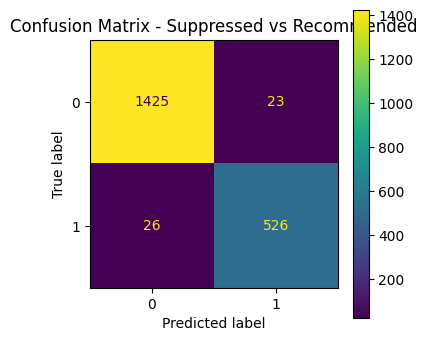

In [23]:
# ============================================
# 7. EVALUATION
# ============================================
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
plt.title("Confusion Matrix - Suppressed vs Recommended")
plt.show()


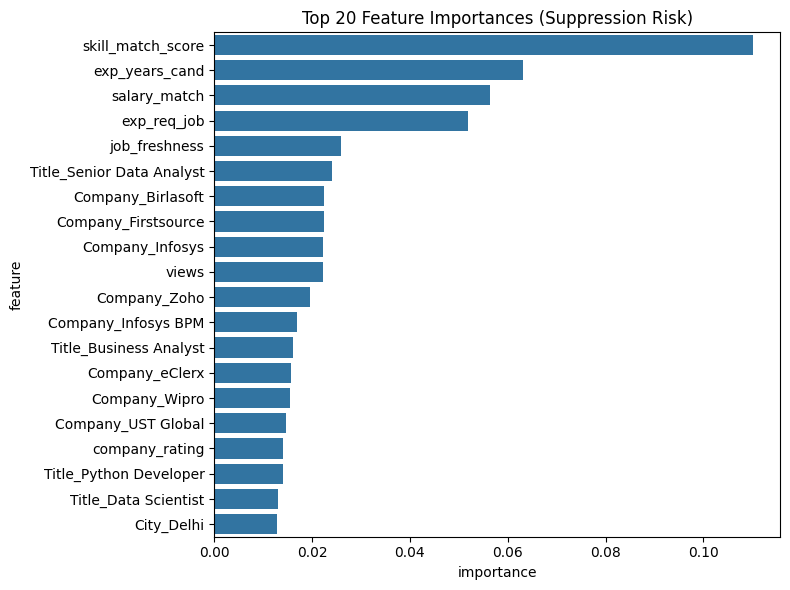

,feature,importance
2,skill_match_score,0.110138
3,exp_years_cand,0.063163
9,salary_match,0.056338
4,exp_req_job,0.051975
7,job_freshness,0.025842
42,Title_Senior Data Analyst,0.024187
50,Company_Birlasoft,0.022513
58,Company_Firstsource,0.022510
67,Company_Infosys,0.022299
12,views,0.022238


In [24]:
# ============================================
# 8. FEATURE IMPORTANCE
# ============================================
ohe = best_model.named_steps["prep"].named_transformers_["cat"]["ohe"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([num_cols, cat_feature_names])

xgb = best_model.named_steps["model"]
importances = xgb.feature_importances_

feat_imp = (
    pd.DataFrame({"feature": all_feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
    .head(20)
)

plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp, x="importance", y="feature")
plt.title("Top 20 Feature Importances (Suppression Risk)")
plt.tight_layout()
plt.show()

feat_imp


In [25]:
# ============================================
# 9. ATS CHECKER + EXPLANATION
# ============================================

def compute_ats_score(row, p_sup, df_all):
    skill = row["skill_match_score"]
    if skill > 1.5:
        skill = skill / 100.0
    skill = np.clip(skill, 0, 1)

    exp_cand = row["exp_years_cand"]
    exp_req = row["exp_req_job"]
    if exp_req <= 0:
        exp_match = 1.0
    else:
        exp_match = np.clip(exp_cand / exp_req, 0, 1.5)
    exp_match = min(exp_match, 1.0)

    fresh = norm(row["job_freshness"], "job_freshness", df_all)
    act   = norm(row["search_activity"], "search_activity", df_all)

    raw_score = 0.6 * skill + 0.2 * exp_match + 0.1 * fresh + 0.1 * act
    ats_score = int(round(raw_score * 100))

    final_score = int(round(ats_score * (1 - p_sup)))
    return final_score, ats_score


def generate_reasons_and_suggestions(row, p_sup, ats_score, final_score,
                                     df_all, threshold=0.5):
    reasons, suggestions = [], []
    suppressed_pred = int(p_sup >= threshold)

    # Skill
    skill = row["skill_match_score"]
    if skill > 1.5:
        skill_norm = skill / 100.0
    else:
        skill_norm = skill
    if skill_norm < 0.5:
        reasons.append("Low skill match with job requirements.")
        suggestions.append("Add more role-specific skills and keywords from the job description to the resume.")
    elif skill_norm < 0.7:
        suggestions.append("Highlight more relevant tools and technologies in the resume.")

    # Experience
    exp_cand = row["exp_years_cand"]
    exp_req = row["exp_req_job"]
    if exp_req > 0 and exp_cand + 0.5 < exp_req:
        reasons.append("Experience below job requirement.")
        suggestions.append("Gain project or internship experience and clearly show years on the resume.")

    # Salary
    sal = row["salary_match"]
    if sal > 1.5:
        sal = sal / 100.0
    if sal < 0.4:
        reasons.append("Salary expectation does not match typical range.")
        suggestions.append("Align salary expectations with market or justify with strong achievements.")

    # History
    if row["past_success_rate"] < df_all["past_success_rate"].median():
        reasons.append("Low past success rate for similar jobs.")
        suggestions.append("Focus on roles where your skills match better and refine applications using feedback.")

    # ATS keyword density proxy
    if ats_score < 60:
        reasons.append("Resume may lack enough targeted keywords (low ATS score).")
        suggestions.append("Add detailed bullet points with tools, technologies and measurable outcomes from the JD.")

    if not suggestions:
        suggestions.append("Maintain strong alignment of skills, experience and keywords with the job description.")

    return {
        "suppressed_pred": suppressed_pred,
        "decision_label": "SUPPRESSED" if suppressed_pred == 1 else "RECOMMENDED",
        "prob_suppressed": float(p_sup),
        "ats_score": int(ats_score),
        "final_match_score": int(final_score),
        "reasons": reasons,
        "suggestions": suggestions,
    }


In [26]:
# single example
sample_idx = X_test.index[0]
sample_row = X.loc[sample_idx]
sample_df = pd.DataFrame([sample_row])

p_sup = best_model.predict_proba(sample_df)[:, 1][0]
final_score, ats_score = compute_ats_score(sample_row, p_sup, df)

exp = generate_reasons_and_suggestions(sample_row, p_sup, ats_score, final_score, df)

print("Decision:", exp["decision_label"])
print("Prob suppressed:", exp["prob_suppressed"])
print("ATS score:", exp["ats_score"])
print("Final match score:", exp["final_match_score"])
print("\nReasons:")
for r in exp["reasons"]:
    print(" -", r)
print("\nSuggestions:")
for s in exp["suggestions"]:
    print(" -", s)


Decision: RECOMMENDED
Prob suppressed: 2.098812501571956e-06
ATS score: 75
Final match score: 75

Reasons:

Suggestions:
 - Maintain strong alignment of skills, experience and keywords with the job description.


In [29]:
# batch analysis for table/cards
def analyze_rows(X_subset, df_all, model):
    probs = model.predict_proba(X_subset)[:, 1]
    out_rows = []
    for i, idx in enumerate(X_subset.index):
        row = X.loc[idx]
        p_sup = probs[i]
        final_score, ats_score = compute_ats_score(row, p_sup, df_all)
        exp = generate_reasons_and_suggestions(row, p_sup, ats_score, final_score, df_all)
        out_rows.append({
            "Job.ID": df_all.loc[idx, "Job.ID"],
            "pred_suppressed": exp["suppressed_pred"],
            "decision": exp["decision_label"],
            "prob_suppressed": exp["prob_suppressed"],
            "ats_score": exp["ats_score"],
            "final_match_score": exp["final_match_score"],
            "top_reason": exp["reasons"][0] if exp["reasons"] else "",
            "top_suggestion": exp["suggestions"][0] if exp["suggestions"] else "",
        })
    return pd.DataFrame(out_rows)

analysis_df = analyze_rows(X_test, df, best_model)

# <<< add this line >>>
analysis_df["prob_suppressed"] = analysis_df["prob_suppressed"].map("{:.6f}".format)

analysis_df.head()


,Job.ID,pred_suppressed,decision,prob_suppressed,ats_score,final_match_score,top_reason,top_suggestion
0,5168,0,RECOMMENDED,0.000002,75,75,,"Maintain strong alignment of skills, experienc..."
1,9269,0,RECOMMENDED,0.000001,77,77,,"Maintain strong alignment of skills, experienc..."
2,7608,0,RECOMMENDED,0.000069,55,55,Low skill match with job requirements.,Add more role-specific skills and keywords fro...
3,7221,0,RECOMMENDED,0.007336,60,60,Low skill match with job requirements.,Add more role-specific skills and keywords fro...
4,5876,1,SUPPRESSED,0.999997,33,0,Low skill match with job requirements.,Add more role-specific skills and keywords fro...


In [30]:
import joblib

# save trained model
joblib.dump(best_model, "job_suppression_model.joblib")

# (optional) also save the dataset used for analysis, if you want
analysis_df.to_csv("job_suppression_analysis_sample.csv", index=False)


In [34]:
df['Title'].tolist()


['Cloud Engineer',
 'BI Developer',
 'AI Engineer',
 'Business Analyst',
 'Big Data Engineer',
 'SQL Developer',
 'Senior Data Scientist',
 'Senior Data Scientist',
 'Database Developer',
 'Database Developer',
 'Senior Data Analyst',
 'Business Intelligence Analyst',
 'Junior Data Analyst',
 'Database Developer',
 'AWS Engineer',
 'Junior Data Analyst',
 'Business Analyst',
 'MLOps Engineer',
 'Python Developer',
 'Business Intelligence Analyst',
 'Streamlit Developer',
 'Backend Developer',
 'DevOps Engineer',
 'Power BI Developer',
 'BI Developer',
 'Senior Data Analyst',
 'Senior ML Engineer',
 'Business Analyst',
 'Data Scientist',
 'Data Engineer',
 'Lead Data Analyst',
 'Streamlit Developer',
 'Django Developer',
 'Data Scientist',
 'Full Stack Developer',
 'Junior Data Analyst',
 'ETL Developer',
 'DevOps Engineer',
 'Senior ML Engineer',
 'AI Engineer',
 'Django Developer',
 'Tableau Developer',
 'Lead Data Analyst',
 'Junior Data Analyst',
 'Junior ML Engineer',
 'Lead Data A